In [124]:
import pandas as pd
import numpy as np
import pickle

In [125]:
import matplotlib.pyplot as plt
import random

In [126]:

# read in the iterables
coinbase_tickers = pickle.load(open('data/crypto/iterables/coinbase_tickers.pkl', 'rb'))
time_intervals = pickle.load(open('data/crypto/iterables/time_intervals.pkl', 'rb'))

In [127]:
def plot(data, plt_col, plt_rows, ymin, ymax, gen_rand=False, with_title=False):
    fig, axs = plt.subplots(plt_rows, plt_col)
    plt.figure(figsize=(20,20))
    plt.tight_layout(pad=.5)
    for i in range(0,plt_rows):
        for j in range(0,plt_col):
            idx = (i * plt_col) + j
            # reached end
            if idx >= len(data):
                break
            axs[i,j].plot(data.loc[coinbase_tickers[idx]], linewidth=0.5)
            axs[i,j].set_ylim([ymin, ymax])
            if with_title:
                axs[i,j].set_title(coinbase_tickers[idx], fontsize=10)
    for ax in axs.flat:
        ax.label_outer()

In [128]:
def get_frac_time(bartime):
    fracChange, fracHigh, fracLow = [], [], []
    for ticker in coinbase_tickers:
        data = pd.read_csv('data/crypto/data/formatted/{t}/{t}_{b}_data_formatted.csv'.format(t=ticker,b=bartime))
        data['fracChange'] = (data['close'].sub(data['open'])).div(data['open'])
        data['fracHigh'] = (data['high'].sub(data['open'])).div(data['open'])
        data['fracLow'] = (data['open'].sub(data['low'])).div(data['open'])
        fracChange.append(data['fracChange'].values)
        fracHigh.append(data['fracHigh'].values)
        fracLow.append(data['fracLow'].values)
    fracChange = pd.DataFrame(fracChange, index=coinbase_tickers)
    fracHigh = pd.DataFrame(fracHigh, index=coinbase_tickers)
    fracLow = pd.DataFrame(fracLow, index=coinbase_tickers)
    return fracChange, fracHigh, fracLow


Data for 1 day timeframe

In [129]:
df_1_day_fracChange, df_1_day_fracHigh, df_1_day_fracLow = get_frac_time('1_day')

In [130]:
df_1_day_fracChange

,0,1,2,3,4,5,6,7,8,9,...,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255
btcusd,-0.028542,0.094432,0.029377,0.007696,0.118734,0.010101,-0.057721,-0.078348,-0.028513,0.030700,...,0.003424,0.054117,0.046798,0.095342,-0.020946,0.020540,-0.006309,0.018252,0.078255,-0.054410
ethusd,0.018687,0.140740,0.092476,-0.000977,0.030174,0.047152,0.111023,0.019109,0.129102,-0.028712,...,0.040355,0.020868,0.020543,0.043777,-0.013246,0.028201,-0.004848,0.019210,0.041055,-0.013781
xrpusd,0.030019,0.060686,0.277280,-0.000769,-0.083726,0.057510,0.046925,-0.138008,-0.156919,-0.056824,...,-0.004221,0.015294,0.064428,-0.018551,0.019976,0.024519,0.071541,-0.026865,0.034769,-0.081098
bchusd,-0.016917,0.095897,-0.002489,-0.071546,0.014923,0.052844,-0.003438,-0.045203,-0.014335,0.207360,...,0.001009,0.025978,0.066157,0.013073,0.004043,0.061976,0.585223,-0.061464,0.007454,-0.152234
ltcusd,-0.017445,0.122008,-0.014771,-0.026412,0.016175,0.130350,-0.026090,-0.069138,-0.028188,0.019028,...,-0.003551,0.025652,0.028341,0.007293,0.073798,0.061883,0.114027,-0.040795,-0.019394,-0.079722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,-0.068671,-0.050454,0.027687,0.016156,-0.090663,-0.045411,-0.111520,0.006167,0.028428,-0.061229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,-0.100952,0.068553,-0.041837,0.002506,-0.023974,0.085142,-0.034007,0.032652,0.026737,0.042147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,-0.029657,-0.145314,-0.071357,0.088219,-0.038576,0.037494,-0.030617,-0.066531,-0.053319,0.033908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.019896,0.040752,-0.017975,0.017950,-0.011533,-0.041845,0.035478,0.044275,-0.030101,-0.028258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_1_day_fracHigh

,0,1,2,3,4,5,6,7,8,9,...,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255
btcusd,0.048943,0.147630,0.059539,0.023109,0.134565,0.019140,0.002554,0.009570,0.035871,0.038046,...,0.008017,0.062748,0.057247,0.123043,0.018974,0.034114,0.000965,0.019570,0.086251,0.018012
ethusd,0.047469,0.182127,0.111961,0.061464,0.087918,0.054975,0.113930,0.102457,0.144229,0.080379,...,0.043046,0.027430,0.035445,0.077489,0.039966,0.033880,0.007344,0.020448,0.045860,0.054148
xrpusd,0.065590,0.084942,0.332414,0.226257,0.122013,0.140593,0.063349,0.005924,0.045159,0.032770,...,0.007157,0.019348,0.084392,0.034783,0.087719,0.028435,0.083174,0.000465,0.062041,0.032840
bchusd,0.024834,0.159932,0.088058,0.004008,0.064006,0.096747,0.099132,0.018035,0.037048,0.261409,...,0.012443,0.033779,0.148799,0.072023,0.090303,0.072847,0.603639,0.057260,0.017350,0.018012
ltcusd,0.056798,0.185629,0.051584,0.011097,0.088094,0.248800,0.034285,0.008502,0.141687,0.044257,...,0.003679,0.042183,0.061962,0.053485,0.141204,0.077885,0.114380,0.002748,0.021488,0.033011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.014363,0.007732,0.044178,0.083637,0.040294,0.002239,0.017303,0.076149,0.124609,0.026293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.003129,0.119098,0.001131,0.002506,0.045595,0.245781,0.043763,0.051352,0.036485,0.132132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.059733,0.025365,0.076382,0.175363,0.013848,0.091423,0.137284,0.002539,0.007073,0.072989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.024915,0.049359,0.054943,0.033310,0.009837,0.002744,0.038882,0.047215,0.003825,0.026032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df_1_day_fracLow

,0,1,2,3,4,5,6,7,8,9,...,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255
btcusd,0.072747,0.052650,0.017240,0.071947,0.028694,0.044926,0.089804,0.165338,0.052596,0.078309,...,0.005421,0.016678,0.002593,0.018864,0.038102,0.011116,0.013705,0.011214,0.014880,0.133602
ethusd,0.027116,0.001514,0.021663,0.051772,0.043449,0.011806,0.006402,0.148509,0.019358,0.074653,...,0.002994,0.024819,0.005376,0.041176,0.025288,0.000772,0.012529,0.018626,0.017293,0.120489
xrpusd,0.085623,0.100239,0.018975,0.141881,0.211657,0.025853,0.042535,0.418034,0.229154,0.220918,...,0.006240,0.025797,0.006570,0.131014,0.015755,0.007151,0.003822,0.089964,0.021419,0.182855
bchusd,0.049389,0.011483,0.025440,0.092270,0.028653,0.032527,0.014144,0.128192,0.041000,0.037479,...,0.007847,0.021275,0.001055,0.054478,0.018667,0.003355,0.002874,0.092784,0.078679,0.285253
ltcusd,0.047277,0.010935,0.039684,0.125851,0.033915,0.025302,0.096700,0.168170,0.070903,0.068659,...,0.009375,0.015676,0.000597,0.054565,0.007036,0.000000,0.006084,0.117523,0.035372,0.211082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.071544,0.067272,0.018933,0.034578,0.172898,0.056924,0.118107,0.024418,0.003381,0.062082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.121769,0.004540,0.078869,0.067522,0.032505,0.017179,0.084878,0.032509,0.005710,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.035088,0.151763,0.103015,0.010758,0.055391,0.001541,0.070123,0.078720,0.075626,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.016670,0.020727,0.034085,0.009838,0.030190,0.047162,0.052320,0.005707,0.044404,0.050009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


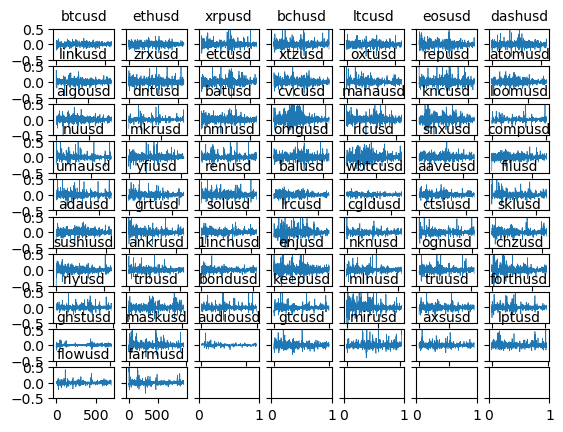

<Figure size 2000x2000 with 0 Axes>

In [133]:
# fracChange
plot(df_1_day_fracChange, plt_col=7, plt_rows=10, ymin=-0.5, ymax=0.5, gen_rand=True, with_title=True)

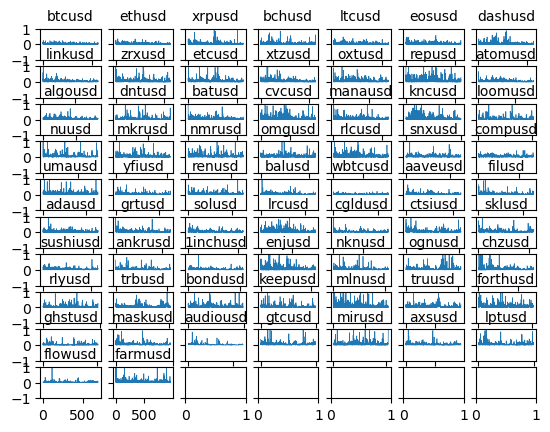

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracHigh
plot(df_1_day_fracHigh, plt_col=7, plt_rows=10, ymin=0, ymax=0.75, gen_rand=True, with_title=True)

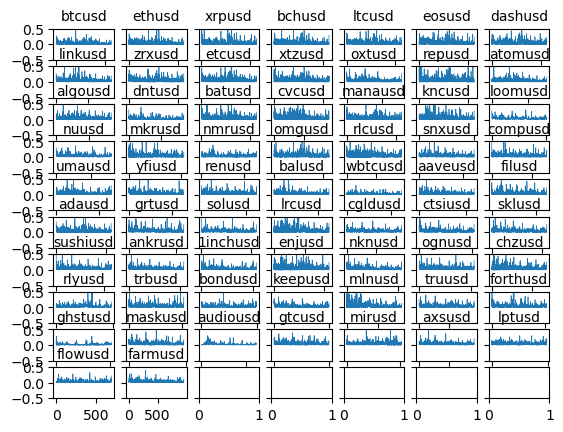

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracLow
plot(df_1_day_fracLow, plt_col=7, plt_rows=10, ymin=0, ymax=0.5, gen_rand=True, with_title=True)

Data for 4 hour timeframe

Data for 4 hour timeframe

In [136]:
df_4_hour_fracChange, df_4_hour_fracHigh, df_4_hour_fracLow = get_frac_time('4_hour')

In [137]:
df_4_hour_fracChange

,0,1,2,3,4,5,6,7,8,9,...,13526,13527,13528,13529,13530,13531,13532,13533,13534,13535
btcusd,-0.026945,0.017248,-0.027859,-0.006583,0.001732,0.007215,-0.014075,0.002929,0.016682,0.011323,...,0.018475,0.019457,0.014958,0.008331,-0.002073,-0.027874,0.007393,0.001267,-0.082491,0.047249
ethusd,-0.007467,0.016290,-0.018612,0.019319,0.000027,0.009738,0.097811,0.037546,0.003282,0.013768,...,0.007947,0.016054,0.009966,0.009938,0.016875,-0.004907,0.015541,0.013726,-0.109887,0.064140
xrpusd,-0.024580,0.005583,-0.007058,-0.009998,-0.014662,0.085508,-0.054152,0.017185,0.027539,0.031883,...,0.035792,0.003574,-0.009736,-0.010810,0.008171,-0.020037,0.014513,-0.016769,-0.109981,0.047820
bchusd,-0.007136,0.010923,-0.023067,-0.000388,-0.003618,0.006915,0.024995,-0.015803,0.025842,0.039646,...,-0.041665,0.008709,-0.024339,-0.134760,0.071120,NaN,NaN,NaN,NaN,NaN
ltcusd,-0.025517,0.022663,-0.006450,-0.003026,-0.019182,-0.010226,0.082726,0.011793,-0.000997,0.039291,...,-0.003808,0.009685,-0.013275,-0.122216,0.057038,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,-0.041113,-0.028649,-0.033443,0.001400,0.008499,-0.001983,-0.027419,0.002449,0.000713,-0.007121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,-0.062585,-0.044949,0.019219,0.046722,0.001133,-0.023917,0.010305,0.017728,-0.027138,0.012041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.027987,-0.052610,0.006879,-0.053373,-0.069432,0.027616,0.001408,-0.065789,0.031658,-0.068580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,-0.049333,0.030505,-0.008862,-0.007221,0.025988,-0.075650,0.017563,-0.003964,-0.002167,0.003977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_4_hour_fracHigh

,0,1,2,3,4,5,6,7,8,9,...,13526,13527,13528,13529,13530,13531,13532,13533,13534,13535
btcusd,0.020575,0.078392,0.033852,0.052205,0.039425,0.042908,0.036495,0.025347,0.044474,0.049446,...,0.023823,0.021849,0.016095,0.015809,0.007217,0.006448,0.014987,0.039322,0.002423,0.048572
ethusd,0.010909,0.040963,0.019992,0.028404,0.027106,0.038268,0.182127,0.048840,0.024695,0.023831,...,0.018803,0.018757,0.024688,0.013357,0.019044,0.014033,0.018560,0.025773,0.003170,0.065513
xrpusd,0.019921,0.038292,0.053446,0.041143,0.038297,0.122995,0.025854,0.046159,0.044242,0.094859,...,0.044877,0.008178,0.001358,0.000320,0.032840,0.005353,0.019663,0.008308,0.005006,0.048347
bchusd,0.007757,0.032200,0.010624,0.012332,0.006752,0.030577,0.046470,0.000771,0.032254,0.077083,...,0.008372,0.019936,0.021662,0.005998,0.080793,NaN,NaN,NaN,NaN,NaN
ltcusd,0.023685,0.075542,0.042241,0.028985,0.018116,0.035012,0.140396,0.026670,0.047338,0.101802,...,0.018705,0.020158,0.019969,0.005201,0.064649,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.014363,0.027057,0.007732,0.017400,0.013199,0.017747,0.009438,0.017551,0.011604,0.003154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.003129,0.007226,0.089588,0.067932,0.047006,0.020521,0.015965,0.030412,0.001131,0.020020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.059733,0.027732,0.009888,0.018360,0.003156,0.051357,0.018301,0.008459,0.042211,0.041829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.001667,0.039271,0.028630,0.014443,0.029106,0.003040,0.020124,0.010450,0.010834,0.006146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df_4_hour_fracLow

,0,1,2,3,4,5,6,7,8,9,...,13526,13527,13528,13529,13530,13531,13532,13533,13534,13535
btcusd,0.040308,0.009781,0.043405,0.040287,0.024555,0.003300,0.022664,0.039054,0.003808,0.001981,...,0.000877,0.009673,0.006568,0.011895,0.013528,0.056552,0.012267,0.006023,0.117506,0.005329
ethusd,0.027116,0.013938,0.031069,0.026430,0.014749,0.000430,0.001514,0.007717,0.020891,0.014859,...,0.000652,0.012763,0.008256,0.011002,0.009165,0.014201,0.006109,0.001661,0.155836,0.010994
xrpusd,0.034880,0.029010,0.026995,0.056742,0.031742,0.001070,0.100239,0.031380,0.016294,0.006426,...,0.006120,0.024080,0.041811,0.016832,0.008850,0.054298,0.015543,0.027692,0.170839,0.016122
bchusd,0.027149,0.012038,0.031064,0.030172,0.022076,0.002886,0.010826,0.035589,0.007890,0.011429,...,0.056126,0.024110,0.032279,0.218265,0.023156,NaN,NaN,NaN,NaN,NaN
ltcusd,0.047277,0.012978,0.022499,0.035931,0.032880,0.017278,0.010935,0.037050,0.008915,0.003226,...,0.044803,0.010473,0.019154,0.205642,0.016886,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.066427,0.031645,0.033443,0.016800,0.003000,0.013484,0.033280,0.015306,0.008754,0.019430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.078231,0.067062,0.001211,0.024325,0.015999,0.040476,0.010885,0.004612,0.031802,0.004352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.031746,0.057912,0.040413,0.064902,0.080703,0.017442,0.055842,0.072838,0.010050,0.074416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.056000,0.000701,0.018746,0.023728,0.004158,0.080378,0.016465,0.013333,0.024196,0.016631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


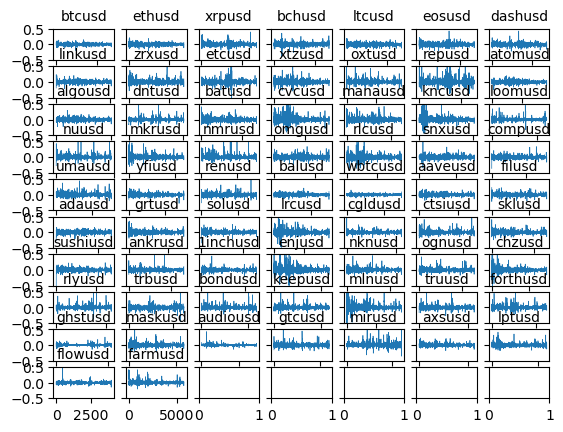

<Figure size 2000x2000 with 0 Axes>

In [140]:
# fracChange
plot(df_4_hour_fracChange, plt_col=7, plt_rows=10, ymin=-0.5, ymax=0.5, gen_rand=True, with_title=True)

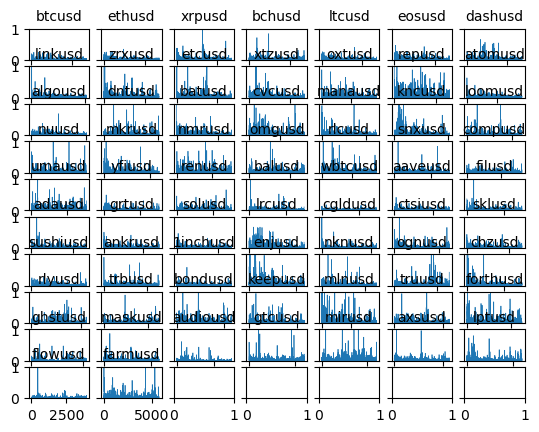

<Figure size 2000x2000 with 0 Axes>

In [141]:
# fracHigh
plot(df_4_hour_fracHigh, plt_col=7, plt_rows=10, ymin=0, ymax=1, gen_rand=True, with_title=True)

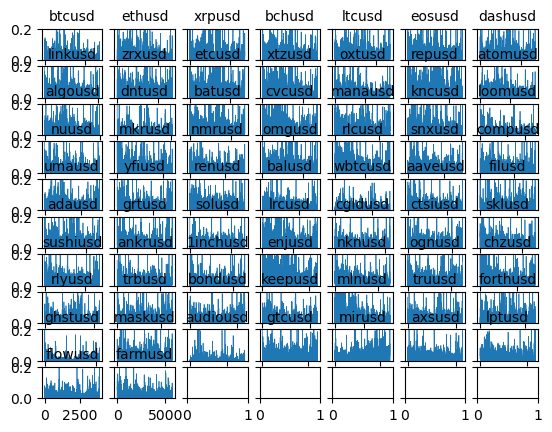

<Figure size 2000x2000 with 0 Axes>

In [142]:
# fracLow
plot(df_4_hour_fracLow, plt_col=7, plt_rows=10, ymin=0, ymax=0.2, gen_rand=True, with_title=True)

Data for 1 hour timeframe

In [143]:
df_1_hour_fracChange, df_1_hour_fracHigh, df_1_hour_fracLow = get_frac_time('1_hour')

In [144]:
df_1_hour_fracChange

,0,1,2,3,4,5,6,7,8,9,...,54134,54135,54136,54137,54138,54139,54140,54141,54142,54143
btcusd,-0.011766,-0.023529,0.006175,-0.000744,0.016949,0.002312,0.027762,-0.011321,-0.015729,0.013412,...,0.011030,-0.029932,-0.020836,0.002131,-0.023850,-0.041693,0.006889,0.022966,0.002801,0.014703
ethusd,-0.009526,-0.013048,0.011921,0.014361,0.003907,0.009921,0.015245,-0.011115,-0.014553,0.012692,...,0.003360,-0.006517,-0.025797,-0.000466,-0.020225,-0.067408,0.007573,0.041443,-0.004347,0.020275
xrpusd,-0.013416,-0.012741,0.011413,-0.018734,-0.006052,0.011280,0.014407,-0.028285,0.030618,-0.024169,...,-0.003011,-0.015406,-0.018930,-0.000894,-0.015985,-0.076011,0.002971,0.030691,0.003233,0.011026
bchusd,-0.002919,-0.017674,0.001191,0.017100,0.005455,-0.005595,0.012083,-0.000971,-0.007647,0.009651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,-0.010627,-0.012692,0.005413,0.015601,0.014552,-0.008129,0.023755,-0.017582,0.000200,0.022155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,-0.008079,-0.020275,-0.018123,0.005838,-0.003839,-0.006674,-0.004826,-0.013408,-0.000870,-0.014403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,-0.062585,-0.007949,0.007865,-0.057803,0.012720,0.016192,-0.002382,0.007761,-0.002518,-0.009196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,-0.009190,-0.016863,0.014996,0.037521,-0.011419,0.000413,-0.038509,0.000431,-0.005159,-0.024633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,-0.023000,-0.008174,-0.014423,-0.006272,0.014376,0.002763,-0.000689,0.009619,-0.004772,0.014374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_1_hour_fracHigh

,0,1,2,3,4,5,6,7,8,9,...,54134,54135,54136,54137,54138,54139,54140,54141,54142,54143
btcusd,0.020575,0.020993,0.027523,0.036614,0.037333,0.022372,0.069765,0.032221,0.033852,0.035254,...,0.016499,0.006937,0.002423,0.002908,0.000615,0.004284,0.028538,0.035094,0.007564,0.015985
ethusd,0.010909,0.011748,0.018408,0.032587,0.013925,0.012435,0.031508,0.012891,0.019992,0.028585,...,0.007696,0.005289,0.003170,0.000949,0.000176,0.004312,0.030152,0.045312,0.002239,0.021591
xrpusd,0.013832,0.014721,0.027680,0.026034,0.038292,0.036201,0.034483,0.002813,0.053446,0.002034,...,0.001843,0.006162,0.005006,0.001533,0.000160,0.005360,0.019726,0.035040,0.004169,0.011535
bchusd,0.007757,0.001030,0.006223,0.028803,0.025796,0.002979,0.020263,0.020055,0.010624,0.011776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.023685,0.018280,0.013670,0.047146,0.032840,0.015071,0.059723,0.027872,0.042241,0.039369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.014363,0.005340,0.002127,0.008945,0.027057,0.002914,0.003312,0.006276,0.007732,0.000773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.003129,0.006937,0.015001,0.000000,0.024981,0.044189,0.015337,0.074627,0.029177,0.000445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.000835,0.018550,0.016281,0.069562,0.022023,0.040892,0.009110,0.005599,0.000000,0.002593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.001667,0.004768,0.002404,0.003136,0.023142,0.020035,0.000344,0.018207,0.003749,0.032854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_1_hour_fracLow

,0,1,2,3,4,5,6,7,8,9,...,54134,54135,54136,54137,54138,54139,54140,54141,54142,54143
btcusd,0.019536,0.027596,0.004970,0.007866,0.009781,0.008929,0.007481,0.014513,0.019879,0.000038,...,0.009831,0.036995,0.043661,0.034305,0.028955,0.078266,0.005329,0.002397,0.011821,0.002945
ethusd,0.016898,0.015263,0.004810,0.000097,0.013938,0.010576,0.008346,0.013141,0.031069,0.000581,...,0.010599,0.016374,0.034642,0.130781,0.026560,0.115550,0.010994,0.000325,0.026689,0.003505
xrpusd,0.034880,0.025279,0.002117,0.027463,0.008661,0.023610,0.016987,0.036004,0.008049,0.033233,...,0.016452,0.026344,0.047403,0.028004,0.020412,0.139191,0.016122,0.001631,0.017679,0.002765
bchusd,0.012683,0.021186,0.006215,0.003402,0.012038,0.012371,0.004958,0.011754,0.011428,0.000929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.021445,0.030145,0.016725,0.004007,0.012978,0.015988,0.008620,0.021927,0.012231,0.001279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.043627,0.022448,0.038373,0.002825,0.008426,0.012878,0.006246,0.016451,0.001643,0.014500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.078231,0.019801,0.006845,0.067197,0.003678,0.001211,0.008487,0.008060,0.014218,0.024325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.024645,0.022766,0.003428,0.004637,0.014274,0.000826,0.040994,0.005168,0.011178,0.035436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.030000,0.024183,0.021635,0.013240,0.000701,0.006908,0.015846,0.003435,0.018746,0.005476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


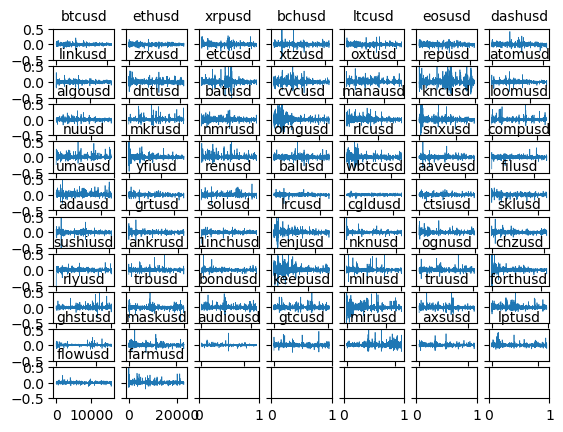

<Figure size 2000x2000 with 0 Axes>

In [147]:
# fracChange
plot(df_1_hour_fracChange, plt_col=7, plt_rows=10, ymin=-0.5, ymax=0.5, gen_rand=True, with_title=True)

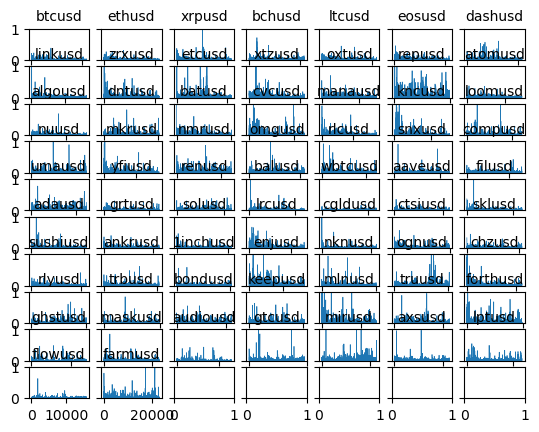

<Figure size 2000x2000 with 0 Axes>

In [148]:
# fracHigh
plot(df_1_hour_fracHigh, plt_col=7, plt_rows=10, ymin=0, ymax=1, gen_rand=True, with_title=True)

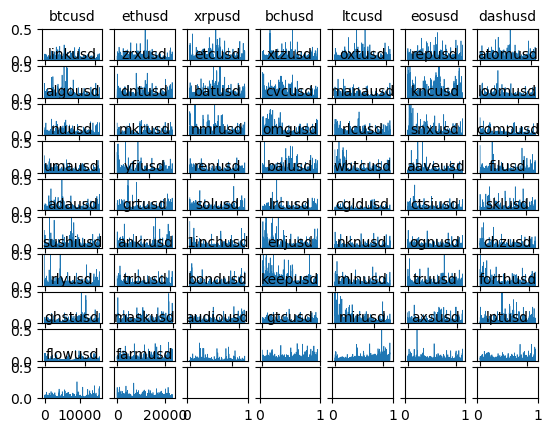

<Figure size 2000x2000 with 0 Axes>

In [149]:
# fracLow
plot(df_1_hour_fracLow, plt_col=7, plt_rows=10, ymin=0, ymax=0.5, gen_rand=True, with_title=True)

Data for 15 minute timeframe

In [150]:
df_15_minute_fracChange, df_15_minute_fracHigh, df_15_minute_fracLow = get_frac_time('15_minute')

In [151]:
df_15_minute_fracChange

,0,1,2,3,4,5,6,7,8,9,...,216566,216567,216568,216569,216570,216571,216572,216573,216574,216575
btcusd,-0.003694,-0.002937,0.016917,-0.004681,-0.005775,0.005317,-0.012932,-0.013322,0.012865,-0.010300,...,-0.001518,-0.007539,0.000931,-0.000766,-0.002613,0.005543,0.003724,0.001647,0.005504,0.002920
ethusd,-0.007873,-0.004389,-0.002746,0.002813,-0.007290,0.013334,-0.006267,-0.007728,0.006016,-0.006957,...,-0.000317,-0.001680,-0.004197,-0.005133,-0.005555,0.011190,0.002955,0.006689,0.004985,0.005087
xrpusd,-0.007023,-0.018556,0.011471,0.003147,-0.021117,0.032370,-0.018790,-0.009221,0.008056,-0.004359,...,-0.005086,0.001534,-0.002722,-0.005801,0.002729,0.009416,0.002545,0.005676,0.000000,0.004043
bchusd,-0.004647,-0.000004,-0.000216,0.001800,-0.001233,-0.001749,-0.007300,-0.001297,0.003000,-0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,-0.012418,-0.005792,0.012554,-0.007314,-0.001017,0.004137,-0.007646,0.001697,0.012339,-0.010272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,-0.012567,-0.010364,0.015158,-0.005250,-0.000183,-0.007670,-0.004049,-0.000185,-0.004811,-0.019522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,-0.061224,-0.006958,0.001164,0.000436,-0.001590,-0.009270,-0.001022,0.004243,-0.002185,0.004230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,-0.005848,-0.015980,0.009829,0.003809,-0.021501,0.008628,0.000429,0.002580,0.001714,0.001710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,-0.003667,-0.006000,-0.014372,-0.002043,-0.006812,-0.010951,0.003804,0.004138,-0.001717,-0.012052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_15_minute_fracHigh

,0,1,2,3,4,5,6,7,8,9,...,216566,216567,216568,216569,216570,216571,216572,216573,216574,216575
btcusd,0.020575,0.020035,0.016990,0.024059,0.015066,0.025366,0.013159,0.010453,0.024096,0.008490,...,0.002907,0.001882,0.007564,0.001321,0.004721,0.007431,0.004665,0.002037,0.006235,0.004187
ethusd,0.010909,0.017664,0.020172,0.013857,0.011748,0.015645,0.009756,0.011963,0.018408,0.009023,...,0.001286,0.001037,0.002239,0.000325,0.003458,0.011827,0.003231,0.006766,0.005127,0.006383
xrpusd,0.013832,0.017278,0.021951,0.028268,0.002792,0.036987,0.004286,0.012878,0.027680,0.015484,...,0.000000,0.002829,0.002552,0.001536,0.007551,0.010358,0.004411,0.007031,0.000842,0.004549
bchusd,0.007757,0.000492,0.002041,0.012187,0.000000,0.003066,0.001322,0.005480,0.003435,0.000972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.023685,0.026765,0.027141,0.011729,0.018280,0.011691,0.015133,0.013900,0.012385,0.012478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.000000,0.000727,0.038126,0.005340,0.004199,0.000091,0.000000,0.000832,0.002683,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.003129,0.002174,0.002765,0.009728,0.006937,0.000000,0.000584,0.006584,0.003641,0.013711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.000835,0.000000,0.009829,0.007194,0.018550,0.018982,0.009001,0.002580,0.006855,0.001710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.000000,0.001667,0.000000,0.012938,0.004768,0.001711,0.007261,0.011034,0.001717,0.005165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df_15_minute_fracLow

,0,1,2,3,4,5,6,7,8,9,...,216566,216567,216568,216569,216570,216571,216572,216573,216574,216575
btcusd,0.015252,0.008883,0.003021,0.009865,0.008640,0.001221,0.014875,0.017431,0.001335,0.017353,...,0.013852,0.013620,0.002421,0.012703,0.003880,0.004243,0.002945,0.003082,0.002657,0.002518
ethusd,0.010231,0.007957,0.003804,0.004473,0.008425,0.001349,0.006732,0.009955,0.000749,0.007467,...,0.012316,0.008965,0.007298,0.016295,0.017227,0.002821,0.003505,0.001463,0.003270,0.002341
xrpusd,0.012909,0.023668,0.008290,0.004231,0.025279,0.000052,0.025673,0.015283,0.001136,0.006872,...,0.016376,0.006766,0.005292,0.014997,0.001716,0.003338,0.002765,0.000254,0.003689,0.001196
bchusd,0.012683,0.008055,0.006044,0.004979,0.007661,0.003787,0.014660,0.004868,0.002615,0.003055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.013689,0.008471,0.004566,0.015729,0.005268,0.010337,0.028395,0.016010,0.012995,0.010331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.043627,0.011364,0.000000,0.007332,0.004108,0.009679,0.006257,0.004161,0.007216,0.023891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.064626,0.009857,0.013972,0.001016,0.005059,0.012746,0.007737,0.007754,0.006845,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.005848,0.015980,0.002137,0.000000,0.021501,0.000000,0.003858,0.000860,0.003428,0.002565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.011333,0.006667,0.017380,0.009193,0.012602,0.012663,0.003112,0.012069,0.006181,0.018939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


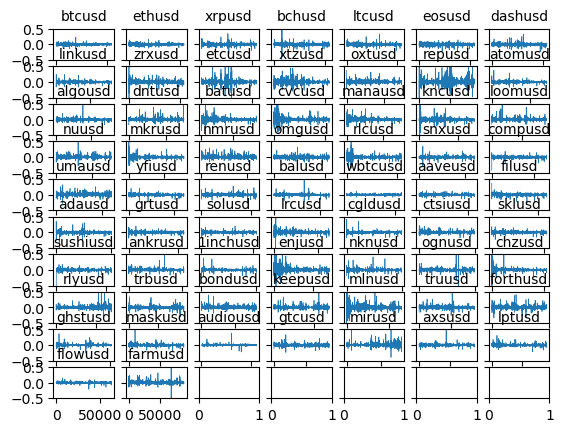

<Figure size 2000x2000 with 0 Axes>

In [156]:
# fracChange
plot(df_15_minute_fracChange, plt_col=7, plt_rows=10, ymin=-0.5, ymax=0.5, gen_rand=True, with_title=True)

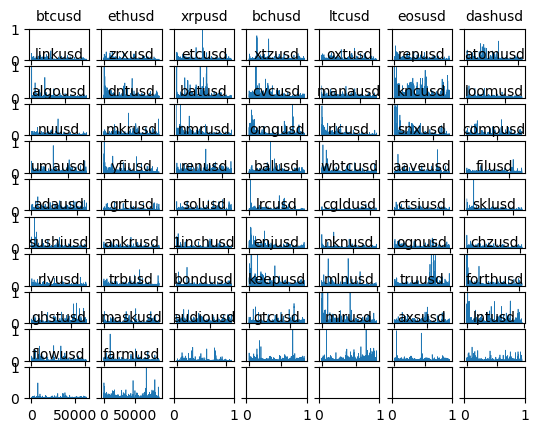

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracHigh
plot(df_15_minute_fracHigh, plt_col=7, plt_rows=10, ymin=0, ymax=1, gen_rand=True, with_title=True)

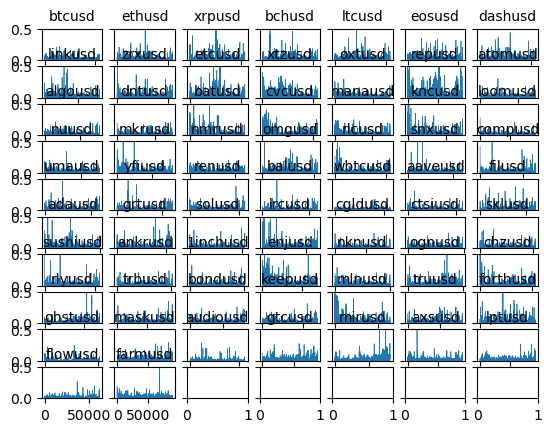

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracLow
plot(df_15_minute_fracLow, plt_col=7, plt_rows=10, ymin=0, ymax=0.5, gen_rand=True, with_title=True)

Data for 5 minute timeframe

In [ ]:
df_5_minute_fracChange, df_5_minute_fracHigh, df_5_minute_fracLow = get_frac_time('5_minute')

In [ ]:
df_5_minute_fracChange

,0,1,2,3,4,5,6,7,8,9,...,649717,649718,649719,649720,649721,649722,649723,649724,649725,649726
btcusd,-0.004358,-0.004222,-0.002535,-0.005580,-0.009011,0.003769,0.000630,-0.001252,0.017025,0.000732,...,0.002029,0.002032,0.001372,-0.002952,0.003240,-0.000178,0.003357,0.002287,0.00300,0.000414
ethusd,-0.006315,-0.014299,-0.016192,-0.002652,-0.006005,0.001664,0.001936,-0.002412,-0.002555,0.008959,...,0.000341,0.000705,0.002343,-0.000966,0.004657,-0.000358,0.002675,0.002454,0.00391,-0.002904
xrpusd,0.006992,0.008142,-0.012166,-0.006032,0.013629,-0.010356,-0.002190,-0.001064,-0.002622,0.003457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bchusd,-0.002493,-0.003824,0.000327,-0.001201,0.000913,-0.000004,-0.000552,0.000000,0.002400,-0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,-0.005778,-0.013642,-0.003319,-0.003914,-0.005781,0.002097,0.016031,-0.002222,0.003491,-0.008023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,-0.012567,-0.008455,-0.000458,-0.001651,0.005696,0.005664,0.003451,-0.003077,-0.000636,-0.000818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,-0.059864,-0.006766,-0.007102,-0.002774,-0.005516,-0.007568,0.005143,0.004087,0.007550,-0.009491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.000418,-0.006678,-0.005467,-0.004255,0.000000,-0.000427,0.000000,0.009829,0.003386,-0.000421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,-0.003667,0.000000,-0.000668,-0.004008,-0.004679,-0.007708,-0.003716,-0.001021,-0.001360,-0.002383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_5_minute_fracHigh

,0,1,2,3,4,5,6,7,8,9,...,649717,649718,649719,649720,649721,649722,649723,649724,649725,649726
btcusd,0.020575,0.022087,0.014222,0.020035,0.012952,0.017517,0.016990,0.016410,0.017025,0.009437,...,0.003275,0.002972,0.002037,0.000197,0.003489,0.001001,0.004510,0.003016,0.004187,0.000478
ethusd,0.010909,0.003679,0.001518,0.017664,0.017989,0.019945,0.015695,0.018200,0.015066,0.013281,...,0.000771,0.000981,0.003184,0.000515,0.004734,0.000110,0.003062,0.002595,0.006383,0.001011
xrpusd,0.013832,0.016794,0.004543,0.017278,0.026170,0.015469,0.021951,0.009631,0.007712,0.016407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bchusd,0.007757,0.006658,0.000913,0.000492,0.000918,0.000000,0.000000,0.004668,0.002519,0.005039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.023685,0.002879,0.031368,0.026765,0.012584,0.025334,0.027141,0.009911,0.009667,0.009588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.000000,0.000727,0.003393,0.001376,0.007901,0.007491,0.026153,0.005340,0.000545,0.000091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.003129,0.000000,0.002174,0.006569,0.000000,0.001892,0.009405,0.005693,0.008567,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.000418,0.000000,0.000000,0.000000,0.003419,0.000000,0.000000,0.009829,0.003386,0.002950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.000000,0.001667,0.002671,0.002672,0.000000,0.000000,0.001351,0.001021,0.011217,0.001361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_5_minute_fracLow

,0,1,2,3,4,5,6,7,8,9,...,649717,649718,649719,649720,649721,649722,649723,649724,649725,649726
btcusd,0.006565,0.010208,0.011125,0.007908,0.010988,0.001196,0.001716,0.003576,0.002490,0.009353,...,0.000000,0.001164,0.001992,0.003870,0.001496,0.002657,0.001066,0.002077,0.002518,0.002269
ethusd,0.006315,0.015633,0.018369,0.003295,0.007360,0.001926,0.001620,0.003865,0.003612,0.004473,...,0.001718,0.001143,0.001463,0.002061,0.000842,0.003270,0.001456,0.002744,0.002341,0.003803
xrpusd,0.007835,0.010025,0.016557,0.013547,0.005130,0.015510,0.002190,0.017745,0.012751,0.000361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bchusd,0.004128,0.011543,0.002178,0.008055,0.006232,0.006642,0.006044,0.003438,0.003443,0.004979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ltcusd,0.006871,0.017093,0.004122,0.006368,0.021006,0.000000,0.004529,0.019196,0.013476,0.014217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirusd,0.043627,0.009091,0.002476,0.002660,0.000000,0.002649,0.001907,0.004345,0.002181,0.002909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axsusd,0.060544,0.010364,0.007102,0.002774,0.008419,0.008587,0.004409,0.000000,0.001016,0.009491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lptusd,0.002089,0.006678,0.007990,0.004255,0.000000,0.000855,0.002137,0.000000,0.000000,0.001686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flowusd,0.011333,0.006667,0.005008,0.004676,0.007019,0.007708,0.006757,0.003745,0.001360,0.009530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


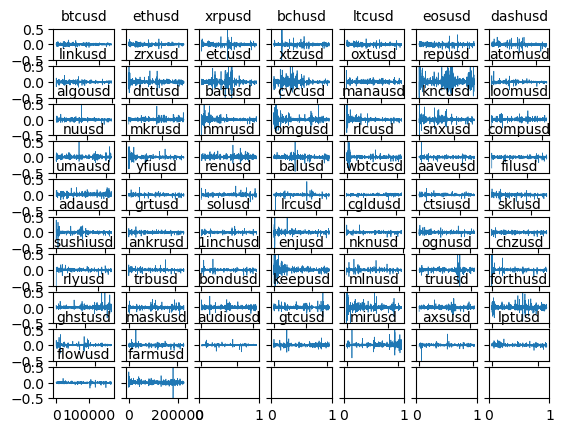

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracChange
plot(df_5_minute_fracChange, plt_col=7, plt_rows=10, ymin=-0.5, ymax=0.5, gen_rand=True, with_title=True)

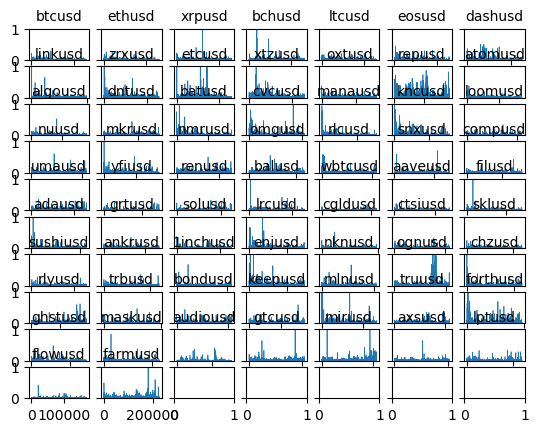

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracHigh
plot(df_5_minute_fracHigh, plt_col=7, plt_rows=10, ymin=0, ymax=1, gen_rand=True, with_title=True)

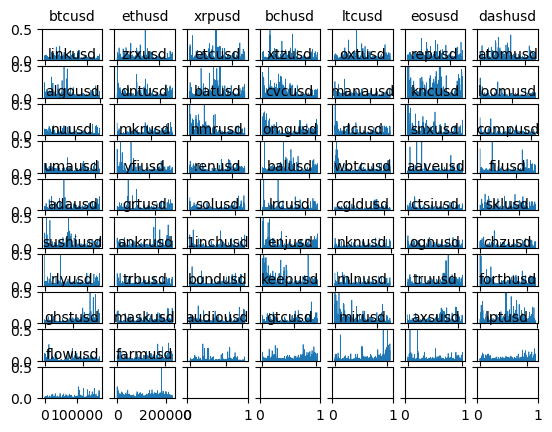

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# fracLow
plot(df_5_minute_fracLow, plt_col=7, plt_rows=10, ymin=0, ymax=0.5, gen_rand=True, with_title=True)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_dataframe_values(df):
    # Extract x and y values
    x_values = df.index
    y_values = df.values.flatten()  # Flatten to 1D array
    
    # Plot
    plt.plot(x_values, y_values)
    plt.xlabel('X values (Index)')
    plt.ylabel('Y values')
    plt.title('Plot of DataFrame Values')
    plt.grid(True)
    plt.show()

# Example usage:
# Create a sample DataFrame

# Plot DataFrame values
plot_dataframe_values(df_4_hour_fracChange.T['solusd'])

NameError: name 'df_4_hour_fracChange' is not defined